In [3]:
# hide the warning messages
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

# 1) Distribution of the residues from a MLP regressor

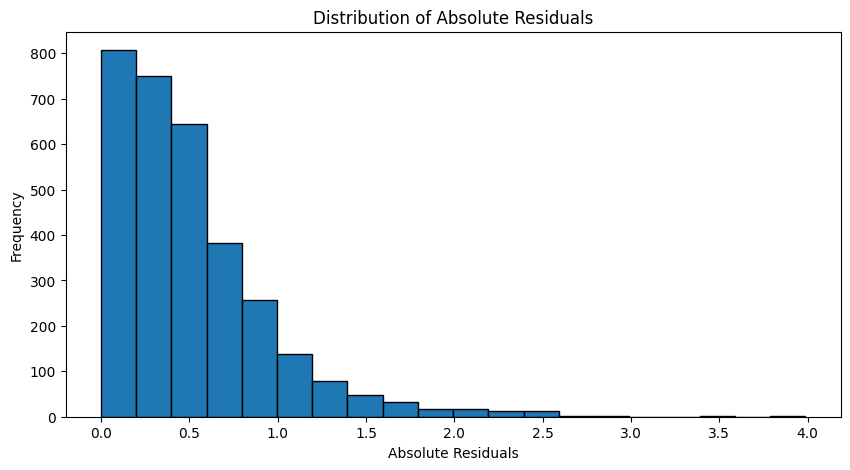

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

# Reading the CSV file
df = pd.read_csv("winequality-red.csv", sep = ';')
X = df.drop(["quality"], axis=1)
y = df["quality"]

n_runs = 10
pred_values = []
test_values = []

for run in range(n_runs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Create and train the MLP regressor
    mlp = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', early_stopping=True, validation_fraction=0.2, random_state=run + 1)
    mlp.fit(X_train, y_train)

    # Predict on the test set
    y_pred = mlp.predict(X_test)

    # Store the values so they can be used in the next question
    test_values.extend(y_test)
    pred_values.extend(y_pred)

# Calculate the absolute residuals
residuals = np.abs(np.array(test_values) - np.array(pred_values))

plt.figure(figsize=(10,5))
plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel('Absolute Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Absolute Residuals')
plt.show()

# 2) Impact of round and bound estimates on the MAE of the MLP learnt in previous question

In [5]:
# Round and bound the predictions
pred_rounded = np.round(pred_values)  # Round to the nearest integer
pred_bounded = np.clip(pred_rounded, a_min=1, a_max=10)  # Bound predictions between 1 and 10

# Calculate the absolute residuals for rounded and bounded the predictions
residuals_new = np.abs(np.array(test_values) - np.array(pred_bounded))

# Calculate the MAEs
mae = np.mean(residuals)
print("MAE for previous exercise:", mae)

mae = np.mean(residuals_new)
print("MAE for rounded and bounded predictions:", mae)

MAE for previous exercise: 0.5097171955009514
MAE for rounded and bounded predictions: 0.43875


### Comment about results
By rounding and bounding the estimates, it is observed that the MAE (Mean Absolute Error) reduces in relation to the previous exercise, which indicates that there was a better performance of this new model.

# 3) Impact of replacing early stopping by a well-defined number of iterations in {20,50,100,200} on RMSE

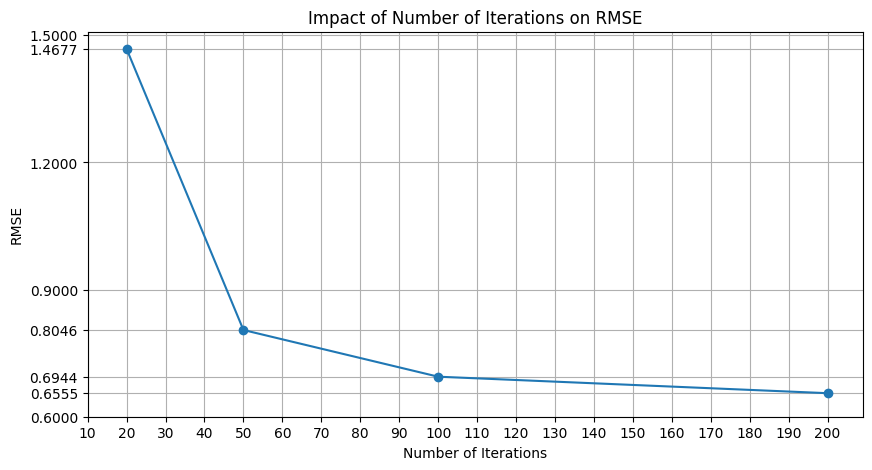

In [6]:
from sklearn.metrics import mean_squared_error
from math import sqrt

n_iterations = [20, 50, 100, 200]
rmse_values = []

for n_iter in n_iterations:
    pred_values = []
    test_values = []

    for run in range(n_runs):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

        # Create and train the MLP regressor with a specific number of iterations
        mlp = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', max_iter=n_iter, random_state=run + 1)
        mlp.fit(X_train, y_train)

        # Predict on the test set
        y_pred = mlp.predict(X_test)

        # Store the values for RMSE calculation
        test_values.extend(y_test)
        pred_values.extend(y_pred)

    # Calculate the RMSE for the current number of iterations
    rmse = sqrt(mean_squared_error(test_values, pred_values))
    rmse_values.append(rmse)

# Plot the RMSE values for different numbers of iterations
plt.figure(figsize=(10, 5))
plt.plot(n_iterations, rmse_values, marker='o')
plt.xlabel('Number of Iterations')
plt.ylabel('RMSE')
interval_x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
plt.xticks(interval_x)
interval_y = [0.6, rmse_values[3], rmse_values[2], rmse_values[1], 0.9, 1.2, rmse_values[0], 1.5]
plt.yticks(interval_y)
plt.title('Impact of Number of Iterations on RMSE')
plt.grid(True)
plt.show()

# 4) Comment the results obtained in previous question.

When the number of iterations is low (20 iterations), the model doesn't have a chance to adjust the weights to completely fit the training data, which leads to a relatively high RMSE (≈1.47). As the number of iterations increases, the model has more opportunities to adjust the weights and reduce the error in the training data, thus decreasing the RMSE. However, if training continues for too many iterations, the model may start to adjust too much to the training data. As it is possible to observe from the exercise above, for a number of iterations equal to 200 a relatively low RMSE (≈0.66) was obtained. When this happens, there may be an increase in error in the test data, thus being in the presence of overfitting.

With this, we conclude that early stopping, on the one hand, is an effective technique to avoid overfitting. However, when we apply this technique, the model may not be able to converge to its optimal performance, due to its training being stopped too early.